In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols


In [2]:
data = pd.read_csv("rsem.merged.gene_tpm.tsv", sep='\t')  


In [3]:
thomas_data = pd.read_csv("HCEC_WTvsHME_WT.deseq2.refseq.results.txt", sep = "\t")

In [4]:
ern_genes_df = pd.read_csv("../ERN_genes_tables/ERN_gene_ensemble_uniprot.csv")  

In [9]:
ERN_genes_ens = ern_genes_df['ensemble']

In [10]:
#dictionary of all ensemble names to uniprot names
ERN_dict = pd.Series(ern_genes_df.uniprot.values, index=ern_genes_df.ensemble).to_dict()

In [11]:
marta_selected_data = data[data['gene_id'].isin(ERN_genes_ens)]
print(marta_selected_data.shape)

(318, 23)


In [14]:
#renaming
marta_selected_data['gene_id'] = marta_selected_data['gene_id'].map(ERN_dict)

/var/folders/g2/5nkmx9rd24x5y578db79brcr0000gq/T/ipykernel_77822/111931911.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marta_selected_data['gene_id'] = marta_selected_data['gene_id'].map(ERN_dict)


In [18]:
 marta_selected_data.columns.values.tolist()

['gene_id',
 'transcript_id(s)',
 'HBC3-T1_Rep1',
 'HBC3-T1_Rep2',
 'HBC3-T1_Rep3',
 'HBC3-T2_Rep1',
 'HBC3-T2_Rep2',
 'HBC3-T2_Rep3',
 'HBC3-T3_Rep1',
 'HBC3-T3_Rep2',
 'HBC3-T3_Rep3',
 'HBC3-T4_Rep1',
 'HBC3_Rep1',
 'HBC3-T4_Rep2',
 'HBC3-T4_Rep3',
 'HBC3_Rep2',
 'HBC3_Rep3',
 'HBC3-P_Rep1',
 'HBC3-P_Rep2',
 'HBC3-P_Rep3',
 'HBC3-KP_Rep1',
 'HBC3-KP_Rep2',
 'HBC3-KP_Rep3']

In [19]:
#reindexing columns (just for 
marta_selected_data = marta_selected_data.reindex(columns=['gene_id',  
                         'HBC3_Rep1','HBC3_Rep2','HBC3_Rep3', 
                         'HBC3-P_Rep1', 'HBC3-P_Rep2', 'HBC3-P_Rep3',
                         'HBC3-KP_Rep1', 'HBC3-KP_Rep2','HBC3-KP_Rep3',                                               
                         'HBC3-T1_Rep1', 'HBC3-T1_Rep2','HBC3-T1_Rep3',
                         'HBC3-T2_Rep1', 'HBC3-T2_Rep2', 'HBC3-T2_Rep3',
                         'HBC3-T3_Rep1', 'HBC3-T3_Rep2', 'HBC3-T3_Rep3',
                         'HBC3-T4_Rep1', 'HBC3-T4_Rep2','HBC3-T4_Rep3'])

In [20]:
ERN_genes_uniprot = ern_genes_df['uniprot'].tolist()

thomas_selected_data = thomas_data[thomas_data['geneID'].isin(ERN_genes_uniprot)]

In [21]:
thomas_selected_data = thomas_selected_data.loc[:, ['geneID',
                                         'HCEC_WT_R1.TPM', 'HCEC_WT_R2.TPM', 'HCEC_WT_R3.TPM', 
                                         'HME_WT_R1.TPM', 'HME_WT_R2.TPM', 'HME_WT_R3.TPM']]

thomas_selected_data.rename(columns={'geneID': 'gene_id'}, inplace=True)

In [23]:
print(thomas_selected_data.shape)
print(marta_selected_data.shape)

(318, 7)
(318, 22)


In [24]:
selected_data = pd.merge(thomas_selected_data, marta_selected_data, on='gene_id', how='inner')

In [25]:
selected_data

,gene_id,HCEC_WT_R1.TPM,HCEC_WT_R2.TPM,HCEC_WT_R3.TPM,HME_WT_R1.TPM,HME_WT_R2.TPM,HME_WT_R3.TPM,HBC3_Rep1,HBC3_Rep2,HBC3_Rep3,...,HBC3-T1_Rep3,HBC3-T2_Rep1,HBC3-T2_Rep2,HBC3-T2_Rep3,HBC3-T3_Rep1,HBC3-T3_Rep2,HBC3-T3_Rep3,HBC3-T4_Rep1,HBC3-T4_Rep2,HBC3-T4_Rep3
0,ACTL6A,89.74,87.11,82.93,122.00,118.78,110.09,57.69,78.33,69.29,...,85.12,68.33,72.18,68.47,79.35,78.11,83.33,73.34,88.36,95.84
1,ALKBH1,12.20,11.87,12.44,13.78,14.09,12.94,8.81,9.60,9.19,...,13.64,12.72,12.46,11.40,12.76,13.75,12.48,17.35,14.53,17.34
2,ARID1A,31.96,30.60,31.04,27.48,26.14,27.22,24.97,28.15,22.92,...,27.00,27.17,27.79,26.10,32.50,27.96,31.30,36.94,35.02,35.34
3,ARID1B,18.36,18.98,17.45,16.51,16.40,17.73,19.29,20.35,18.73,...,18.93,20.29,20.44,22.95,18.48,21.79,21.14,24.83,23.41,24.61
4,ARID2,14.83,14.63,14.70,18.42,17.49,18.23,10.67,9.36,9.51,...,10.79,9.76,8.89,9.59,12.25,10.85,11.55,10.93,9.71,8.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313,ZBTB33,17.08,17.81,18.61,22.02,20.99,19.76,15.46,16.77,16.70,...,12.46,14.97,13.42,14.08,11.65,12.04,14.26,15.47,15.31,14.47
314,ZBTB4,50.94,49.63,51.32,32.47,31.98,33.57,42.96,43.84,41.71,...,29.25,34.14,33.41,32.28,31.10,30.70,32.42,32.95,32.59,33.14
315,ZBTB7C,0.02,0.00,0.00,0.27,0.16,0.31,0.36,0.23,0.31,...,0.00,0.02,0.02,0.00,0.12,0.00,0.16,0.00,0.00,0.00
316,ZMYND11,58.39,58.45,61.19,27.16,27.64,23.53,31.38,31.29,31.89,...,35.18,32.27,31.79,30.47,34.02,31.72,33.16,29.78,30.13,27.86


Right after understanding the consistency I will count mean between three replicates

**Understanding the consistency between samples in one experiment**

In [11]:
HBC3_basic = selected_data[["gene_id", "HBC3_Rep1", "HBC3_Rep2", "HBC3_Rep3"]]
HBC3_basic

,gene_id,HBC3_Rep1,HBC3_Rep2,HBC3_Rep3
52,KDM1A,73.68,73.45,73.26
91,MSL3,18.17,21.61,21.38
92,CREBBP,12.29,13.36,11.83
100,KMT2E,28.73,29.64,28.05
136,KDM7A,2.94,3.94,2.57
...,...,...,...,...
51863,KMT2B,9.39,9.34,7.45
52876,H2AFB1,0.00,0.00,0.00
53839,UHRF1,26.60,28.67,30.01
53943,TADA2A,8.48,9.65,9.13


In [12]:
#melting the df for better easier plot creation
HBC3_basic = HBC3_basic.melt(id_vars='gene_id', var_name='replicate', value_name='expression')
HBC3_basic

,gene_id,replicate,expression
0,KDM1A,HBC3_Rep1,73.68
1,MSL3,HBC3_Rep1,18.17
2,CREBBP,HBC3_Rep1,12.29
3,KMT2E,HBC3_Rep1,28.73
4,KDM7A,HBC3_Rep1,2.94
...,...,...,...
949,KMT2B,HBC3_Rep3,7.45
950,H2AFB1,HBC3_Rep3,0.00
951,UHRF1,HBC3_Rep3,30.01
952,TADA2A,HBC3_Rep3,9.13


/Users/yunonapospelova/miniconda3/envs/ds/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


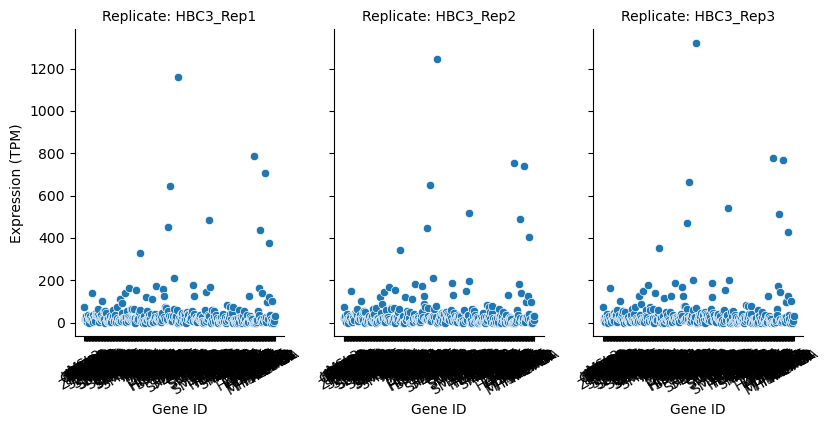

In [13]:
g = sns.FacetGrid(HBC3_basic, col="replicate", height=4, aspect=.7)
g = g.map_dataframe(sns.scatterplot, x="gene_id", y="expression")
g.set_axis_labels("Gene ID", "Expression (TPM)")
g.set_titles("Replicate: {col_name}")
g.set_xticklabels(rotation=30)

plt.show()

In [14]:
#correlation heatmap 
correlation_matrix = HBC3_basic.pivot(index='gene_id', columns='replicate', values='expression').corr()


In [15]:
correlation_matrix

replicate,HBC3_Rep1,HBC3_Rep2,HBC3_Rep3
replicate,,,
HBC3_Rep1,1.000000,0.998653,0.997903
HBC3_Rep2,0.998653,1.000000,0.999484
HBC3_Rep3,0.997903,0.999484,1.000000


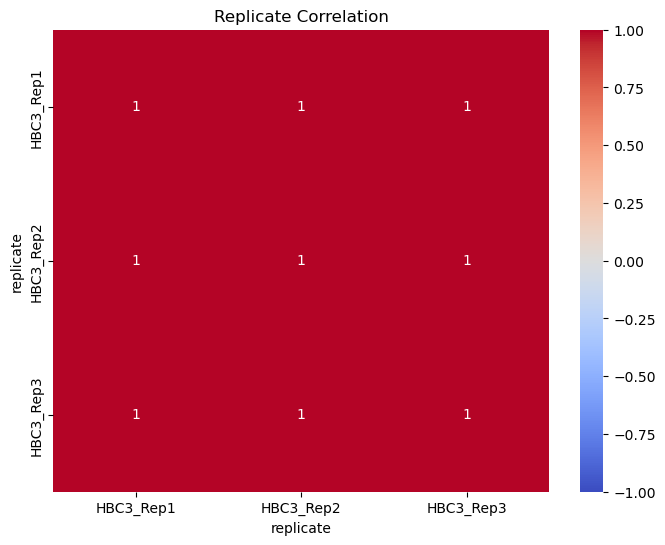

In [16]:
#correlation plot
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Replicate Correlation')
plt.show()

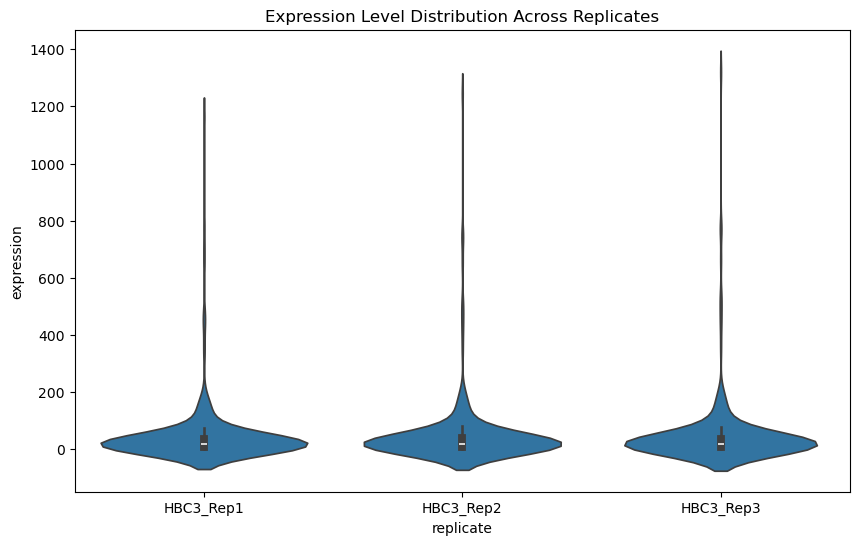

In [17]:
#violin plot

plt.figure(figsize=(10, 6))
sns.violinplot(x='replicate', y='expression', data=HBC3_basic)
plt.title('Expression Level Distribution Across Replicates')
plt.show()

Counting mean between samples

In [26]:
experiment_replicates = {
    'HCEC_WT': ['HCEC_WT_R1.TPM', 'HCEC_WT_R2.TPM', 'HCEC_WT_R3.TPM'], 
    'HME_WT':['HME_WT_R1.TPM', 'HME_WT_R2.TPM', 'HME_WT_R3.TPM'],
    'HBC3': ['HBC3_Rep1', 'HBC3_Rep2', 'HBC3_Rep3'],
    'HBC3-P': ['HBC3-P_Rep1', 'HBC3-P_Rep2', 'HBC3-P_Rep3'],
    'HBC3-KP': ['HBC3-KP_Rep1', 'HBC3-KP_Rep2', 'HBC3-KP_Rep3'],
    'HBC3-T1': ['HBC3-T1_Rep1', 'HBC3-T1_Rep2', 'HBC3-T1_Rep3'],
    'HBC3-T2': ['HBC3-T2_Rep1', 'HBC3-T2_Rep2', 'HBC3-T2_Rep3'],
    'HBC3-T3': ['HBC3-T3_Rep1', 'HBC3-T3_Rep2', 'HBC3-T3_Rep3'],
    'HBC3-T4': ['HBC3-T4_Rep1', 'HBC3-T4_Rep2', 'HBC3-T4_Rep3']
}

# Create a new dataframe to hold the averages
average_expression = pd.DataFrame()

# Add the gene_id column to the new dataframe
average_expression['gene_id'] = selected_data['gene_id']

# Loop over the dictionary and calculate mean for each set of replicates
for experiment, replicates in experiment_replicates.items():
    # Calculate the mean for each row across the specified columns
    average_expression[f'{experiment}'] = selected_data[replicates].mean(axis=1)


In [27]:
average_expression

,gene_id,HCEC_WT,HME_WT,HBC3,HBC3-P,HBC3-KP,HBC3-T1,HBC3-T2,HBC3-T3,HBC3-T4
0,ACTL6A,86.593333,116.956667,68.436667,74.900000,83.653333,91.253333,69.660000,80.263333,85.846667
1,ALKBH1,12.170000,13.603333,9.200000,9.860000,12.950000,12.856667,12.193333,12.996667,16.406667
2,ARID1A,31.200000,26.946667,25.346667,28.413333,25.286667,26.756667,27.020000,30.586667,35.766667
3,ARID1B,18.263333,16.880000,19.456667,23.160000,19.046667,18.920000,21.226667,20.470000,24.283333
4,ARID2,14.720000,18.046667,9.846667,11.176667,10.403333,11.093333,9.413333,11.550000,9.566667
...,...,...,...,...,...,...,...,...,...,...
313,ZBTB33,17.833333,20.923333,16.310000,16.583333,14.226667,12.860000,14.156667,12.650000,15.083333
314,ZBTB4,50.630000,32.673333,42.836667,46.786667,35.706667,28.453333,33.276667,31.406667,32.893333
315,ZBTB7C,0.006667,0.246667,0.300000,0.153333,0.036667,0.000000,0.013333,0.093333,0.000000
316,ZMYND11,59.343333,26.110000,31.520000,34.133333,32.146667,35.213333,31.510000,32.966667,29.256667


**Comparison of overall ERG expression level across all samples**

In [28]:
selected_melted_data = average_expression.melt(id_vars='gene_id', 
                                 var_name='tissue', 
                                 value_name='expression')


In [29]:
'''
selected_melted_data['tissue'] = selected_melted_data['experiment_replicate'].apply(lambda x: x.split('_')[0])
selected_melted_data['replicate'] = selected_melted_data['experiment_replicate'].apply(lambda x: x.split('_')[-1])
'''

"\nselected_melted_data['tissue'] = selected_melted_data['experiment_replicate'].apply(lambda x: x.split('_')[0])\nselected_melted_data['replicate'] = selected_melted_data['experiment_replicate'].apply(lambda x: x.split('_')[-1])\n"

In [30]:
selected_melted_data

,gene_id,tissue,expression
0,ACTL6A,HCEC_WT,86.593333
1,ALKBH1,HCEC_WT,12.170000
2,ARID1A,HCEC_WT,31.200000
3,ARID1B,HCEC_WT,18.263333
4,ARID2,HCEC_WT,14.720000
...,...,...,...
2857,ZBTB33,HBC3-T4,15.083333
2858,ZBTB4,HBC3-T4,32.893333
2859,ZBTB7C,HBC3-T4,0.000000
2860,ZMYND11,HBC3-T4,29.256667


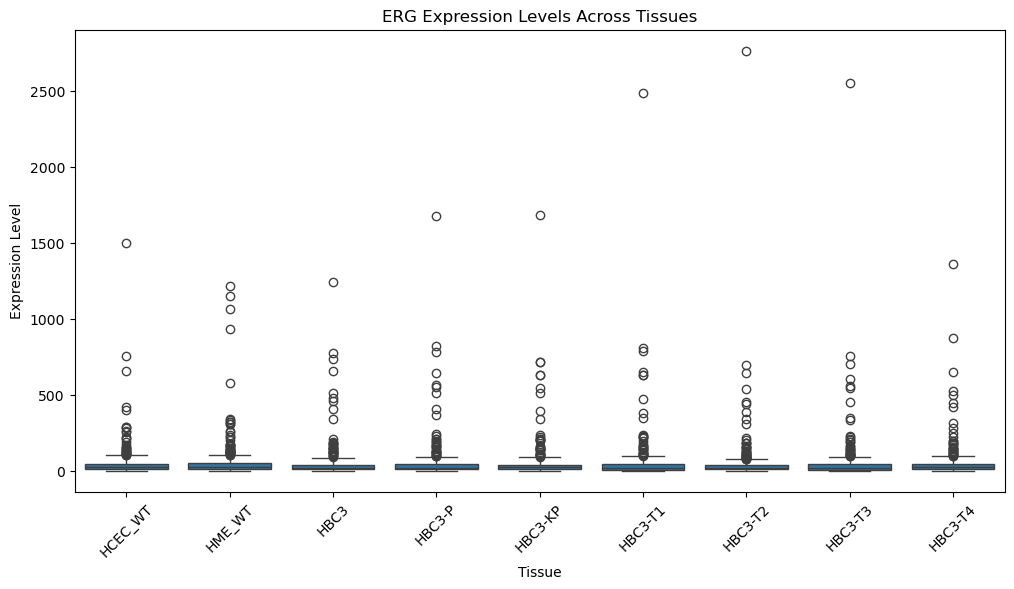

In [31]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='tissue', y='expression', data=selected_melted_data)
plt.title('ERG Expression Levels Across Tissues')
plt.xlabel('Tissue')
plt.ylabel('Expression Level')
plt.xticks(rotation=45)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


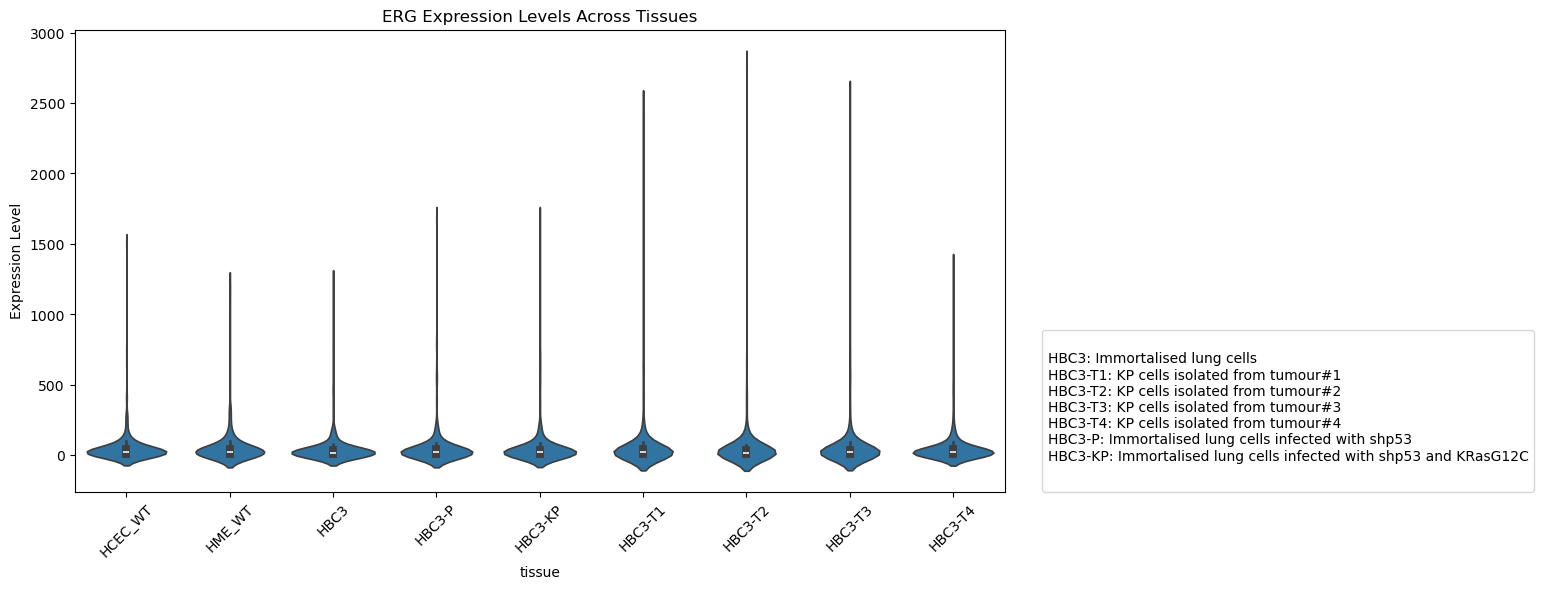

In [32]:
#violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(x='tissue', y='expression', data=selected_melted_data)
plt.title('ERG Expression Levels Across Tissues')
plt.ylabel('Expression Level')
plt.xticks(rotation=45)

legend_text = """
HBC3: Immortalised lung cells
HBC3-T1: KP cells isolated from tumour#1
HBC3-T2: KP cells isolated from tumour#2
HBC3-T3: KP cells isolated from tumour#3
HBC3-T4: KP cells isolated from tumour#4
HBC3-P: Immortalised lung cells infected with shp53
HBC3-KP: Immortalised lung cells infected with shp53 and KRasG12C
"""
plt.legend(bbox_to_anchor=(1.04, 0), loc="lower left", borderaxespad=0, title = legend_text)


# Show the plot

plt.show()

In [33]:
#anova test - is there a significant difference in overall gene expression level across different 
model = ols('expression ~ C(tissue)', data=selected_melted_data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)


                 sum_sq      df         F    PR(>F)
C(tissue)  2.697902e+04     8.0  0.169737  0.994809
Residual   5.668404e+07  2853.0       NaN       NaN


**Are levels for individual genes conserved across tissues/normal cell lines?**

In [34]:
#counting median for each gene and standard deviation
#gene_stats = selected_data.set_index('gene_id').T.describe().T[['mean', 'std']]
gene_stats = average_expression.set_index('gene_id').T.describe().T[['mean', 'std']]
print(gene_stats.head())

              mean        std
gene_id                      
ACTL6A   84.173704  14.548894
ALKBH1   12.470741   2.094953
ARID1A   28.591481   3.396548
ARID1B   20.189630   2.367894
ARID2    11.757407   2.848936


focus on the replicates
1) count average of replicates and then count std - **done!**

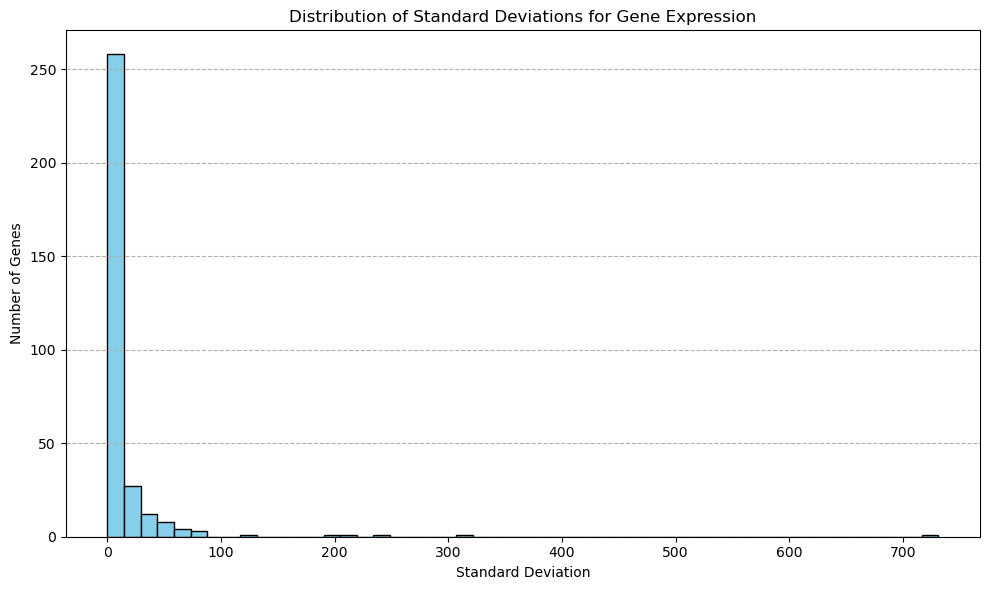

In [35]:
plt.figure(figsize=(10, 6))
plt.hist(gene_stats['std'], bins=50, edgecolor='black', color='skyblue')
plt.title('Distribution of Standard Deviations for Gene Expression')
plt.xlabel('Standard Deviation')
plt.ylabel('Number of Genes')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()


Genes with high standart deviation are highly variable while a low standard deviation indicates consistent expression across tissues. 

In [36]:
#plot top 10 genes with highes std dev
N = 10 
top_variable_genes = gene_stats.nlargest(N, 'std').index.tolist()
#high_std_data = selected_data[selected_data['gene_id'].isin(top_variable_genes)]
high_std_data = average_expression[average_expression['gene_id'].isin(top_variable_genes)]

In [37]:
#here is the statistics for top 10 genes
print(gene_stats.loc[top_variable_genes])

                mean         std
gene_id                         
HMGA1    1715.305926  731.205262
H2AFZ     799.248889  321.350383
HMGN2     675.844074  239.869044
H3F3B     628.282963  205.486014
NAP1L1    666.125185  192.848218
HMGB1     481.907778  127.378419
MBD2      178.741481   82.658950
HMGN1     391.651111   80.482963
TRIM28    435.017778   80.416611
HMGB3     157.683704   65.647261


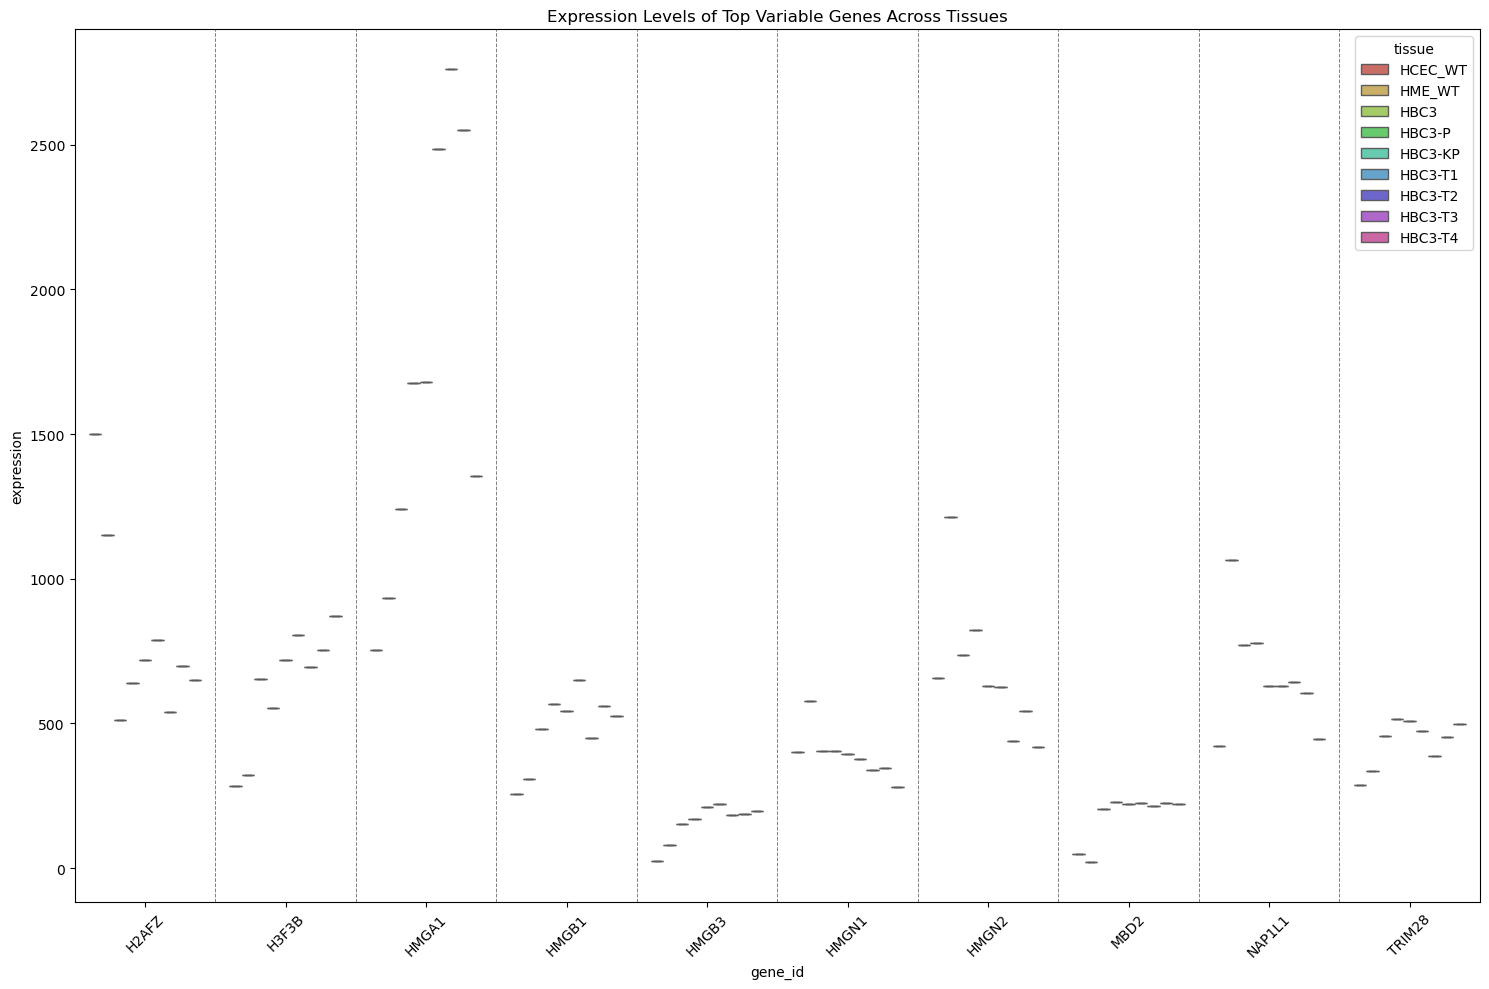

In [38]:
melted_filtered_data = high_std_data.melt(id_vars=['gene_id'], 
                                          var_name='tissue', 
                                          value_name='expression')

# Extract tissue type
#melted_filtered_data['tissue'] = melted_filtered_data['experiment_replicate'].apply(lambda x: x.split('_')[0])

unique_tissues = melted_filtered_data['tissue'].unique()
palette = sns.color_palette("hls", len(unique_tissues))

plt.figure(figsize=(15, 10))
sns.boxplot(x='gene_id', y='expression', hue='tissue', data=melted_filtered_data, palette=palette)



# Add vertical lines between each gene
gene_ids = melted_filtered_data['gene_id'].unique()
for i in range(len(gene_ids) - 1):
    plt.axvline(x=i + 0.5, color='gray', linestyle='--', linewidth=0.7)

plt.title('Expression Levels of Top Variable Genes Across Tissues')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

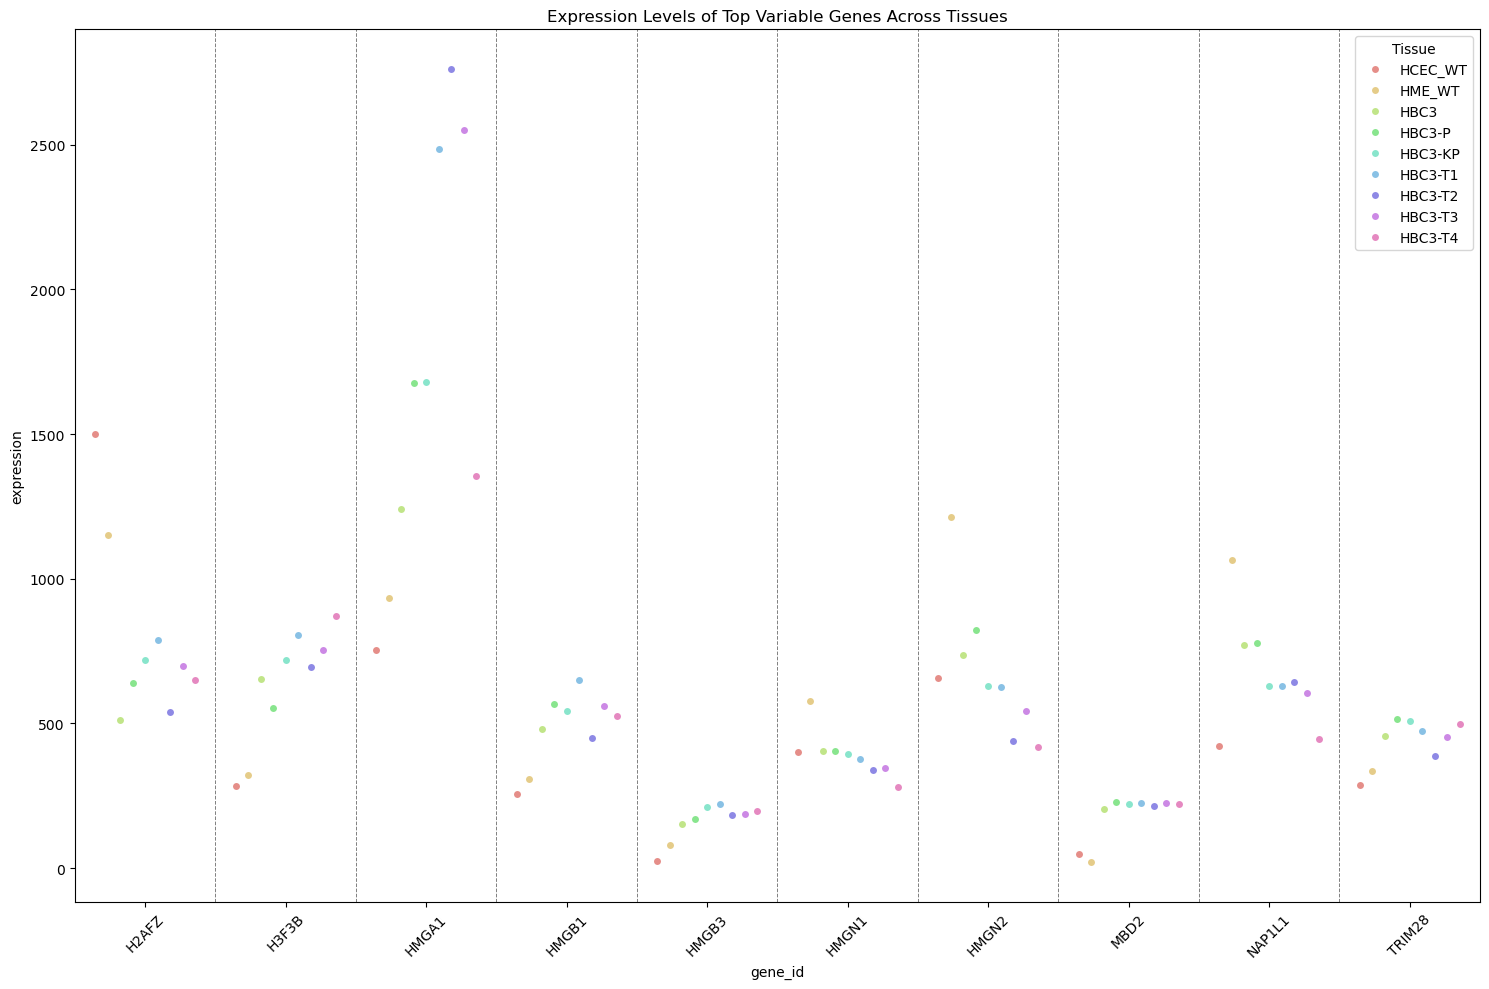

In [39]:
plt.figure(figsize=(15, 10))

# Stripplot to plot dots instead of boxes
sns.stripplot(x='gene_id', y='expression', hue='tissue', data=melted_filtered_data, palette=palette, jitter=True, dodge=True, marker='o', alpha=0.7)

# Add vertical lines between each gene
gene_ids = melted_filtered_data['gene_id'].unique()
for i in range(len(gene_ids) - 1):
    plt.axvline(x=i + 0.5, color='gray', linestyle='--', linewidth=0.7)

plt.title('Expression Levels of Top Variable Genes Across Tissues')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Tissue')
plt.show()


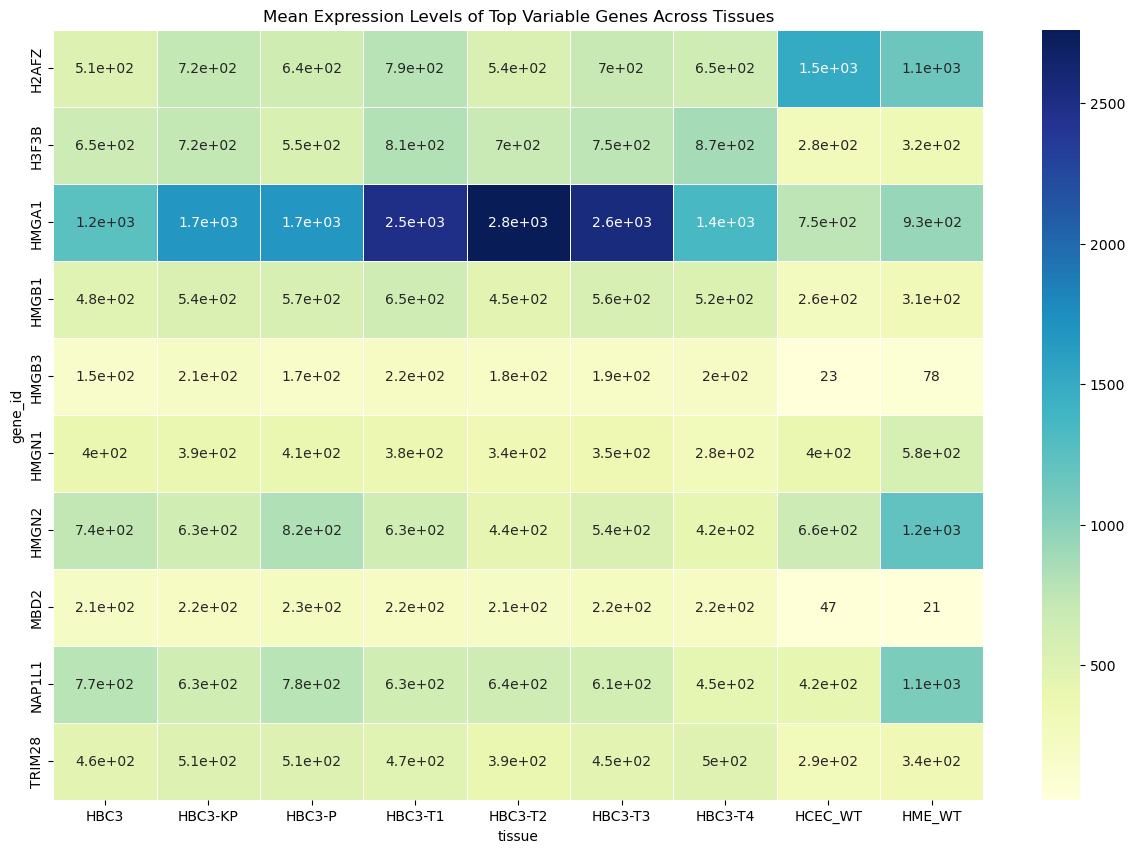

In [40]:
#Heatmap for top genes 
mean_expression = melted_filtered_data.groupby(['gene_id', 'tissue'])['expression'].mean().unstack()

# Generate the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(mean_expression, cmap="YlGnBu", annot=True, linewidths=.5)
plt.title('Mean Expression Levels of Top Variable Genes Across Tissues')
plt.show()

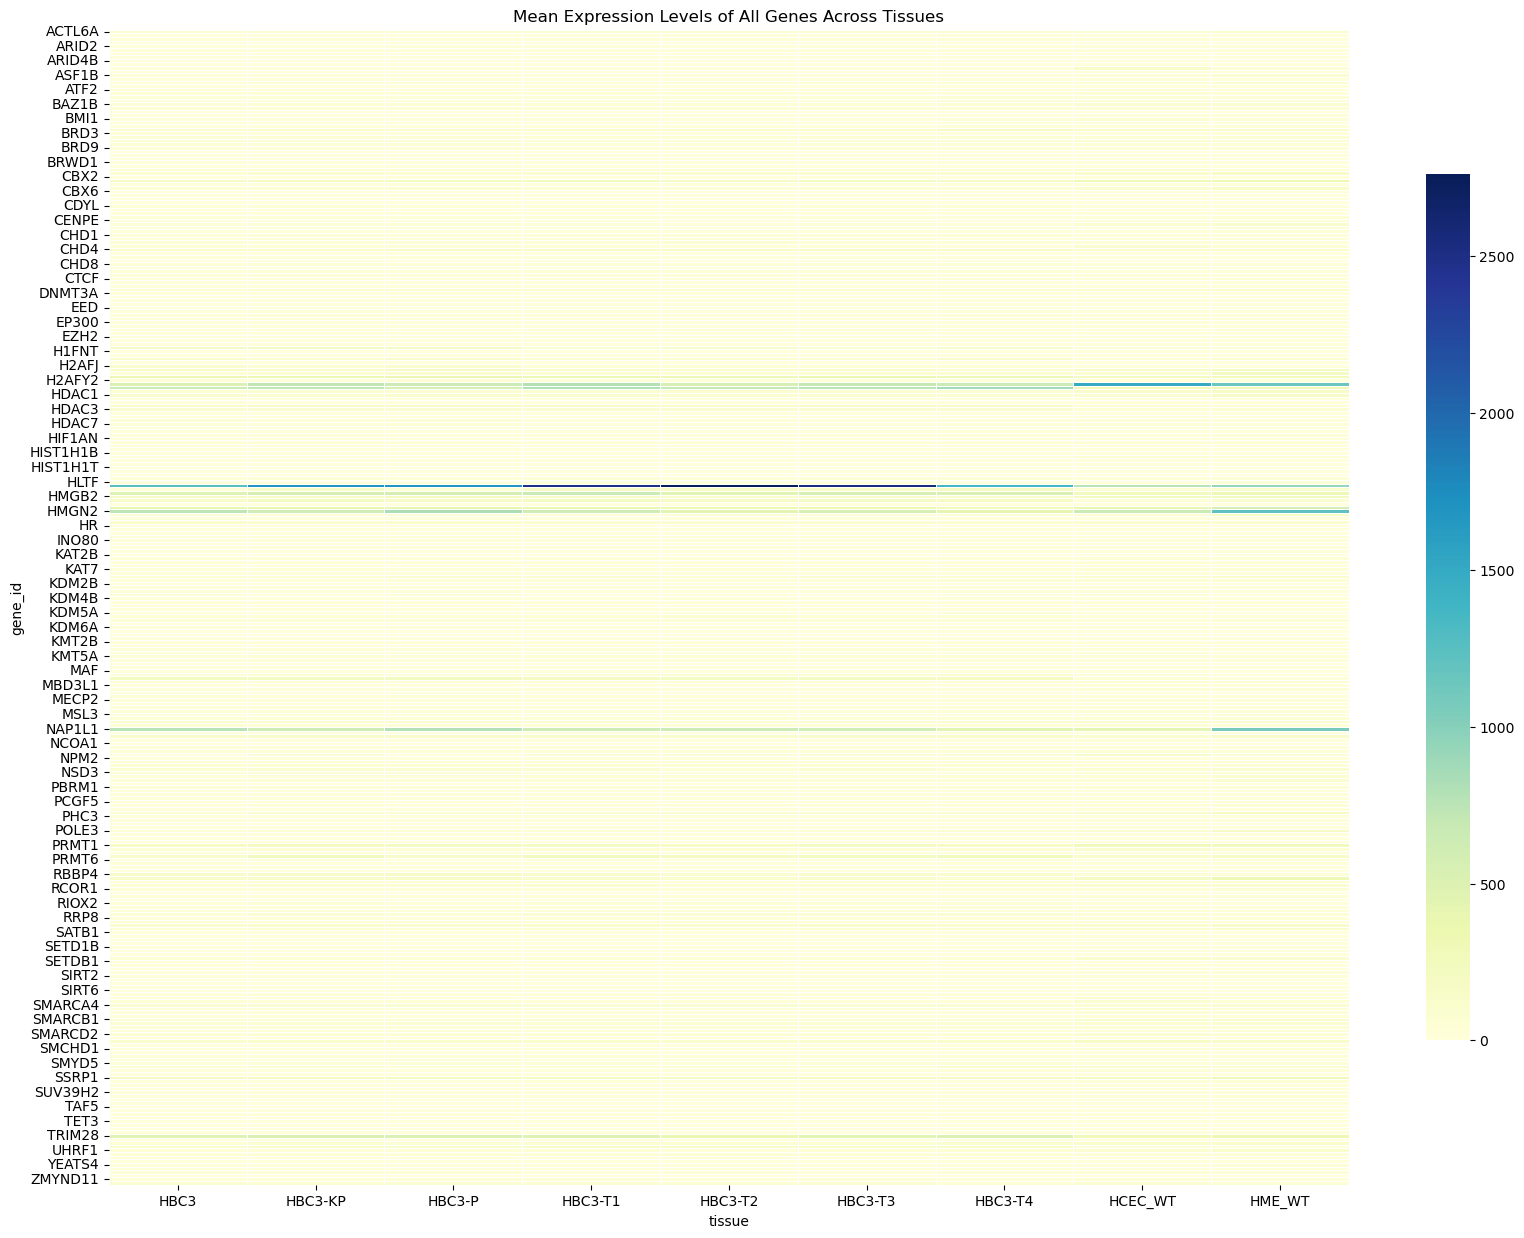

In [41]:
#Heatmap for all genes

mean_expression_all_genes = selected_melted_data.groupby(['gene_id', 'tissue'])['expression'].mean().unstack()

# Generate the heatmap
plt.figure(figsize=(20, 15))  # Adjust the size as needed
sns.heatmap(mean_expression_all_genes, cmap="YlGnBu", linewidths=.5, cbar_kws={"shrink": 0.75})
plt.title('Mean Expression Levels of All Genes Across Tissues')
plt.show()

In [43]:
#saving selected data to csv
selected_data.to_csv("marta_thomas_replicates.csv", index=False)

In [45]:
average_expression.to_csv("marta_thomas_averaged.csv", index=False)

In [46]:
average_expression

,gene_id,HCEC_WT,HME_WT,HBC3,HBC3-P,HBC3-KP,HBC3-T1,HBC3-T2,HBC3-T3,HBC3-T4
0,ACTL6A,86.593333,116.956667,68.436667,74.900000,83.653333,91.253333,69.660000,80.263333,85.846667
1,ALKBH1,12.170000,13.603333,9.200000,9.860000,12.950000,12.856667,12.193333,12.996667,16.406667
2,ARID1A,31.200000,26.946667,25.346667,28.413333,25.286667,26.756667,27.020000,30.586667,35.766667
3,ARID1B,18.263333,16.880000,19.456667,23.160000,19.046667,18.920000,21.226667,20.470000,24.283333
4,ARID2,14.720000,18.046667,9.846667,11.176667,10.403333,11.093333,9.413333,11.550000,9.566667
...,...,...,...,...,...,...,...,...,...,...
313,ZBTB33,17.833333,20.923333,16.310000,16.583333,14.226667,12.860000,14.156667,12.650000,15.083333
314,ZBTB4,50.630000,32.673333,42.836667,46.786667,35.706667,28.453333,33.276667,31.406667,32.893333
315,ZBTB7C,0.006667,0.246667,0.300000,0.153333,0.036667,0.000000,0.013333,0.093333,0.000000
316,ZMYND11,59.343333,26.110000,31.520000,34.133333,32.146667,35.213333,31.510000,32.966667,29.256667
